# Business Case: Yulu_Hypothesis_Testing_19Jan2024

## About Yulu

***Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.***

## Business Problem

***Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.***

## Objective

- ***Which variables are significant in predicting the demand for shared electric cycles in the Indian market?***
- ***How well those variables describe the electric cycle demands***

## Exploratory Data Analysis

In [1]:
import pandas as pd #to read the datasets
import numpy as np # to work with arrays, single or multidimentional array
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.express as px # for data visualization
import statsmodels.api as sm # for statistical analysis
import scipy.stats as scist # for statistical analysis
from scipy import stats # for statistical analysis
from scipy.stats import chi2_contingency, skew, kurtosis # for statistical analysis
from statsmodels.graphics.gofplots import qqplot # for statistical graphs
from statsmodels.formula.api import ols # for statistical analysis

### Loading csv file data to Pandas DataFrame

In [2]:
df = pd.read_csv("bike_sharing.csv")

### Sense check of Dataframe

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Verifying number of Rows & Columns present in the dataset

In [4]:
print(f"No. of Rows : {df.shape[0]}\nNo. of Columns : {df.shape[1]}")

No. of Rows : 10886
No. of Columns : 12


### Verifying Name of Columns

In [5]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Column wise Info about Data types, Name and Null value status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Verifying basic Statistical Summary

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


***Season: The data is evenly distributed across all four seasons.***

***Holiday: Only about 2.86% of the data points are from holidays.***

***Working Day: Approximately 68.09% of the data points are from working days.***

***Weather: Most of the data points (66.07%) have a weather condition of 1.***

***Temperature: The average temperature is 20.23 degrees Celsius, with a minimum of 0.82 and a maximum of 41 degrees Celsius.***

***aTemp: The average “feels like” temperature is 23.65 degrees Celsius.***

***Humidity: The average humidity is 61.89%, with a minimum of 0% and a maximum of 100%.***

***Windspeed: The average windspeed is 12.80, with a maximum speed of 56.99.***

***Casual Users: On average, there are 36.02 casual users per day, with a maximum of 367 users in a day.***

***Registered Users: On average, there are 155.55 registered users per day, with a maximum of 886 users in a day.***

***Total Rental Bikes (Count): On average, there are 191.57 total rental bikes per day, with a maximum of 977 in a day.***

### Checking the Dupliate entries in the entire Dataframe

In [8]:
df.duplicated().sum()

0

#### The above result indicates that there is No Duplicate records in this dataset

### Verifying Number of Null values column wise in the entire dataset

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### The above result indicates that there is No Null values in this dataset

### Verifying the Number of Unique values on specific columns & respective values

In [10]:
lst = ["season","holiday","workingday","weather"]
for i in lst:
    print("~"*100)
    print(i,"--> Unique Value Count->[",df[i].nunique(), "] Unique Values are -->", df[i].unique())
print("~"*100)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
season --> Unique Value Count->[ 4 ] Unique Values are --> [1 2 3 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
holiday --> Unique Value Count->[ 2 ] Unique Values are --> [0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
workingday --> Unique Value Count->[ 2 ] Unique Values are --> [0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
weather --> Unique Value Count->[ 4 ] Unique Values are --> [1 2 3 4]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Plotting the number of number of unique values

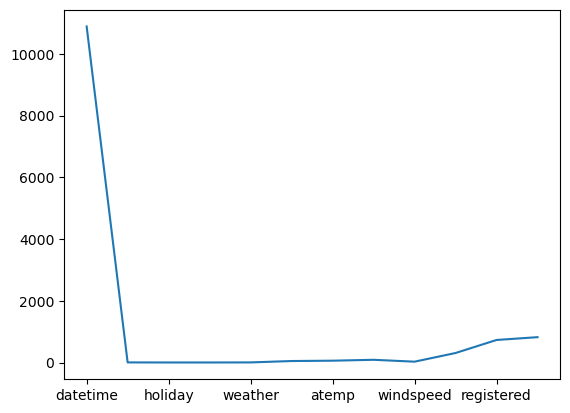

In [11]:
df.nunique().plot()
plt.show()

## Column Profiling

### Categorization of [Season] for further Analysis

In [12]:
df_ctgy = df
df_ctgy["season"] = df.season
df_ctgy["season"].replace({1:"spring",2:"summar",3:"fall",4:"winter"},inplace=True)
df_ctgy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


### Changing the Data types of  ['datetime', 'season', 'holiday', 'workingday', 'weather'] to proper data types for better analysis.

In [13]:
df_ctgy["Date"] = pd.to_datetime(df_ctgy["datetime"]).dt.date
df_ctgy["Day"] = pd.to_datetime(df_ctgy["datetime"]).dt.day
df_ctgy["Month"] = pd.to_datetime(df_ctgy["datetime"]).dt.month
df_ctgy['MonthName'] = pd.to_datetime(df_ctgy["datetime"]).dt.strftime('%b')
df_ctgy["Year"] = pd.to_datetime(df_ctgy["datetime"]).dt.year
cols = ['season', 'holiday', 'workingday', 'weather']
df_ctgy[cols] = df_ctgy[cols].astype('object')
df_ctgy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Date        10886 non-null  object 
 13  Day         10886 non-null  int64  
 14  Month       10886 non-null  int64  
 15  MonthName   10886 non-null  object 
 16  Year        10886 non-null  int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 1.4+ MB


### Categorization (binning)  of [temp]  & [atemp] column for further Analysis

In [14]:
bins = [0,10,20,30,40,float("inf")]
labels = ["0-10","11-20","21-30","30-40",">40"]
df_ctgy["temp_bins"] = pd.cut(df_ctgy["temp"],bins=bins,labels=labels)
df_ctgy["atemp_bins"] = pd.cut(df_ctgy["atemp"],bins=bins,labels=labels)

In [15]:
df_ctgy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,Day,Month,MonthName,Year,temp_bins,atemp_bins
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,1,Jan,2011,0-10,11-20
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,1,Jan,2011,0-10,11-20
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,1,Jan,2011,0-10,11-20
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,1,Jan,2011,0-10,11-20
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,1,Jan,2011,0-10,11-20


## Non-Graphical Analysis

### Value Count & Percentage contributions of various attributes

In [16]:
lsts = ['season','holiday', 'workingday', 'weather','temp_bins','atemp_bins','Day','Month', 'Year']
print("*"*65)
for i in lsts:
    ls = sorted(set(df_ctgy[i].values))
    print(f"Marginal Probability of [{i}] are given below:")
    for j in ls:
        x = df_ctgy[i].value_counts()[j]
        y = df_ctgy.shape[0]
        print(j,"-->","Count->",x,"->",round(x/y*100,2),"%")
    print("*"*75)

*****************************************************************
Marginal Probability of [season] are given below:
fall --> Count-> 2733 -> 25.11 %
spring --> Count-> 2686 -> 24.67 %
summar --> Count-> 2733 -> 25.11 %
winter --> Count-> 2734 -> 25.11 %
***************************************************************************
Marginal Probability of [holiday] are given below:
0 --> Count-> 10575 -> 97.14 %
1 --> Count-> 311 -> 2.86 %
***************************************************************************
Marginal Probability of [workingday] are given below:
0 --> Count-> 3474 -> 31.91 %
1 --> Count-> 7412 -> 68.09 %
***************************************************************************
Marginal Probability of [weather] are given below:
1 --> Count-> 7192 -> 66.07 %
2 --> Count-> 2834 -> 26.03 %
3 --> Count-> 859 -> 7.89 %
4 --> Count-> 1 -> 0.01 %
***************************************************************************
Marginal Probability of [temp_bins] are given below:


##### >>  Season: Each season (fall, spring, summer, winter) has an almost equal share of the data, around 25% each.
##### >>  Holiday: A significant portion of the data (97.14%) corresponds to non-holiday days.
##### >>  Working Day: Over two-thirds of the data (68.09%) pertains to working days.
##### >>  Weather: A majority of the data (66.07%) is associated with weather condition 1, while weather condition 4 is barely represented (0.01%).
##### >>  Temperature Bins: Most rentals occur when the temperature is between 11-30 degrees (77% combined for both ‘temp_bins’ and ‘atemp_bins’).
##### >>  Day: The data is almost evenly distributed across all days of the month, with each day having approximately 5% of the data. However, the 18th day has slightly less data (5.17%).
##### >> Month: The data is nearly equally distributed across all months of the year, with each month representing approximately 8% of the data.
##### >> Year: The data is almost equally divided between the years 2011 (49.81%) and 2012 (50.19%).

## UNIVARIATE ANALYSIS (for multiple variables refer below)

### Outliers Detection using BoxPlots on Numerical columns

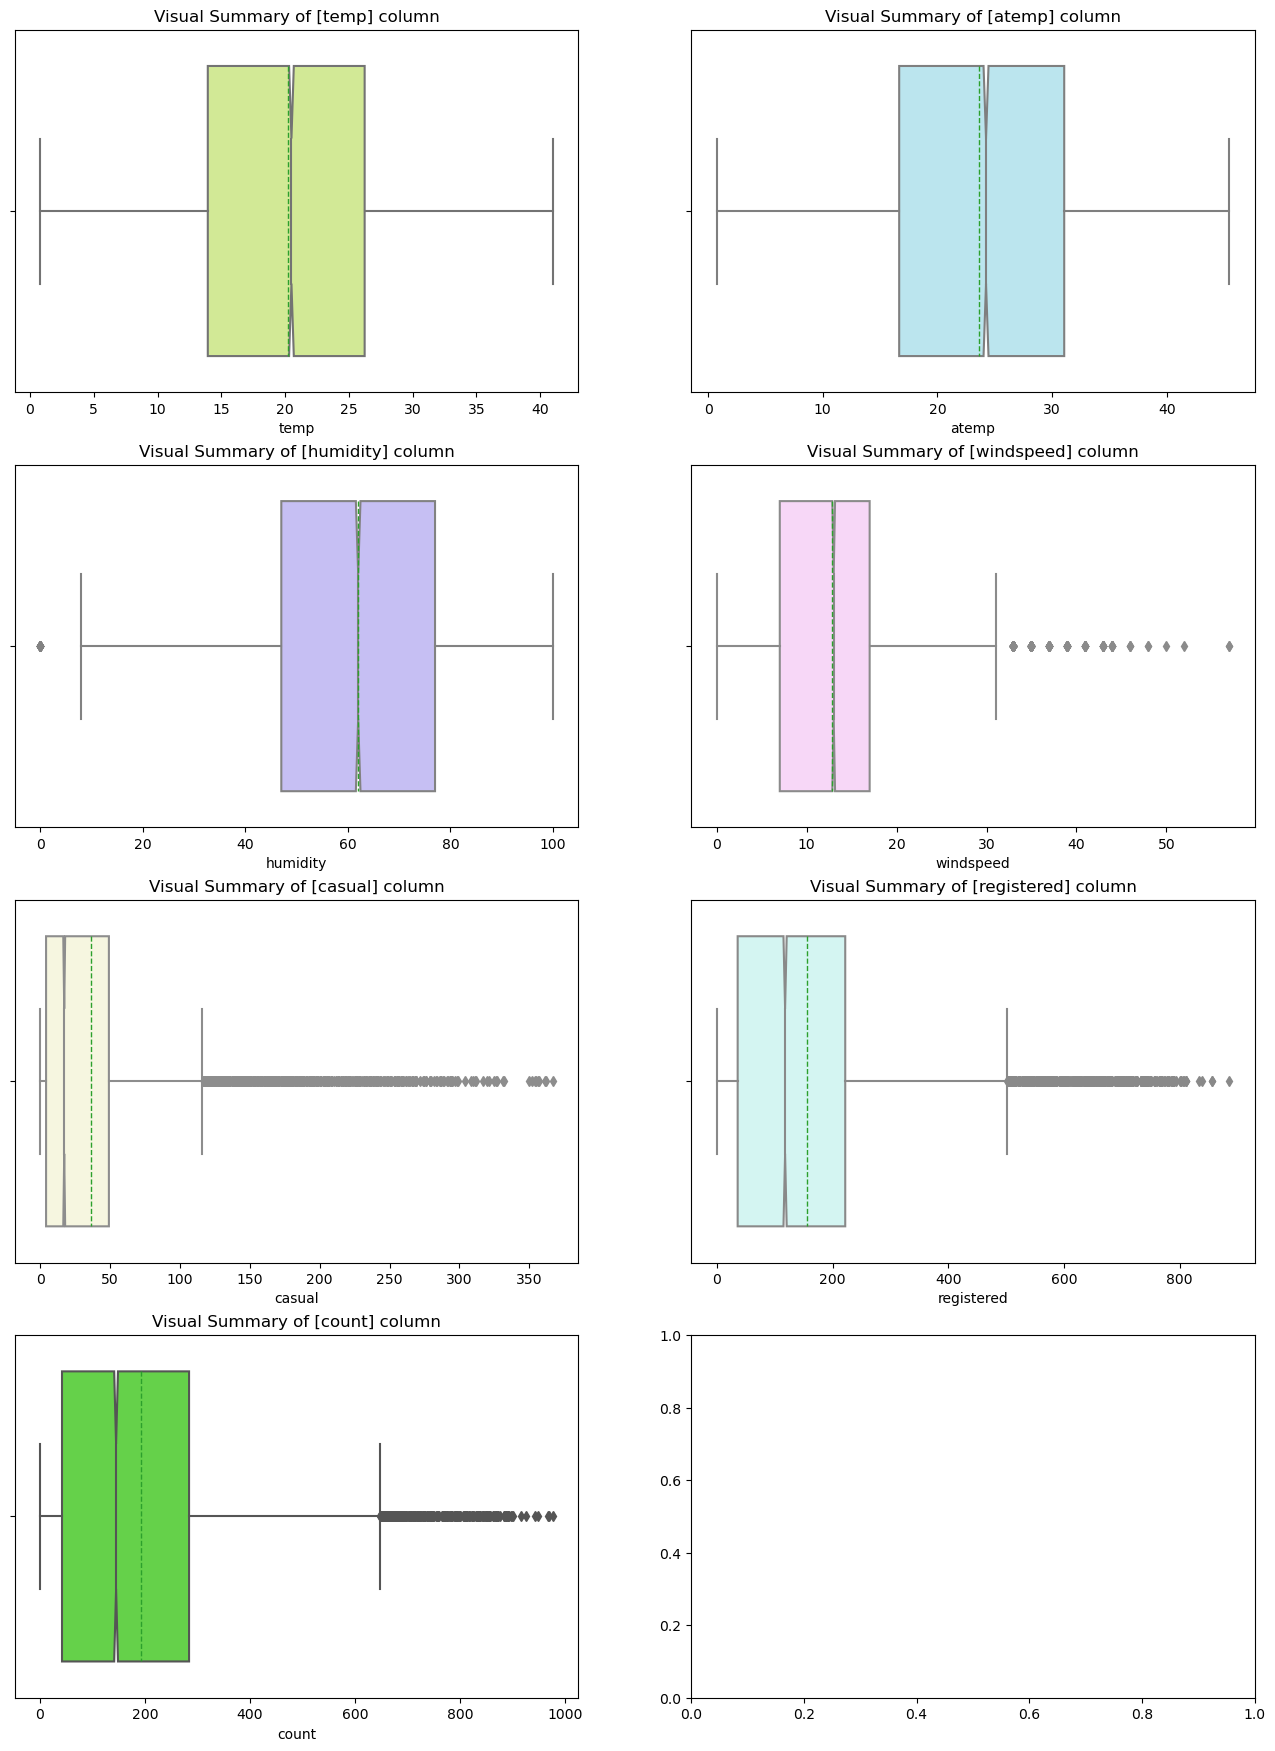

In [17]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(16, 12))
fig.subplots_adjust(top=1.5)
b1 = sns.boxplot(data=df_ctgy, x="temp", orient='h', ax=axis[0,0],color="#d8f788",meanline=True,showmeans=True,notch=True)
b1.set_title("Visual Summary of [temp] column")
b2 = sns.boxplot(data=df_ctgy, x="atemp", orient='h', ax=axis[0,1],color="#b2ebf7",meanline=True,showmeans=True,notch=True)
b2.set_title("Visual Summary of [atemp] column")
b3 = sns.boxplot(data=df_ctgy, x="humidity", orient='h', ax=axis[1,0],color="#bfb6fc",meanline=True,showmeans=True,notch=True)
b3.set_title("Visual Summary of [humidity] column")
b4 = sns.boxplot(data=df_ctgy, x="windspeed", orient='h', ax=axis[1,1],color="#fcd2fc",meanline=True,showmeans=True,notch=True)
b4.set_title("Visual Summary of [windspeed] column")
b5 = sns.boxplot(data=df_ctgy, x="casual", orient='h', ax=axis[2,0],color="#f9fadc",meanline=True,showmeans=True,notch=True)
b5.set_title("Visual Summary of [casual] column")
b6 = sns.boxplot(data=df_ctgy, x="registered", orient='h', ax=axis[2,1],color="#cffaf6",meanline=True,showmeans=True,notch=True)
b6.set_title(f"Visual Summary of [registered] column")
b7 = sns.boxplot(data=df_ctgy, x="count", orient='h', ax=axis[3,0],color="#57e833",meanline=True,showmeans=True,notch=True)
b7.set_title(f"Visual Summary of [count] column")
plt.show()

#### >> The plots suggest that there are No outliers present in temp, atemp and minimal outlier persist in windspeed.
#### >> There are more outliers observed in the casual, registered and count attributes.

### Distribution of count for Various Numerical attributes using Histogram with KDE

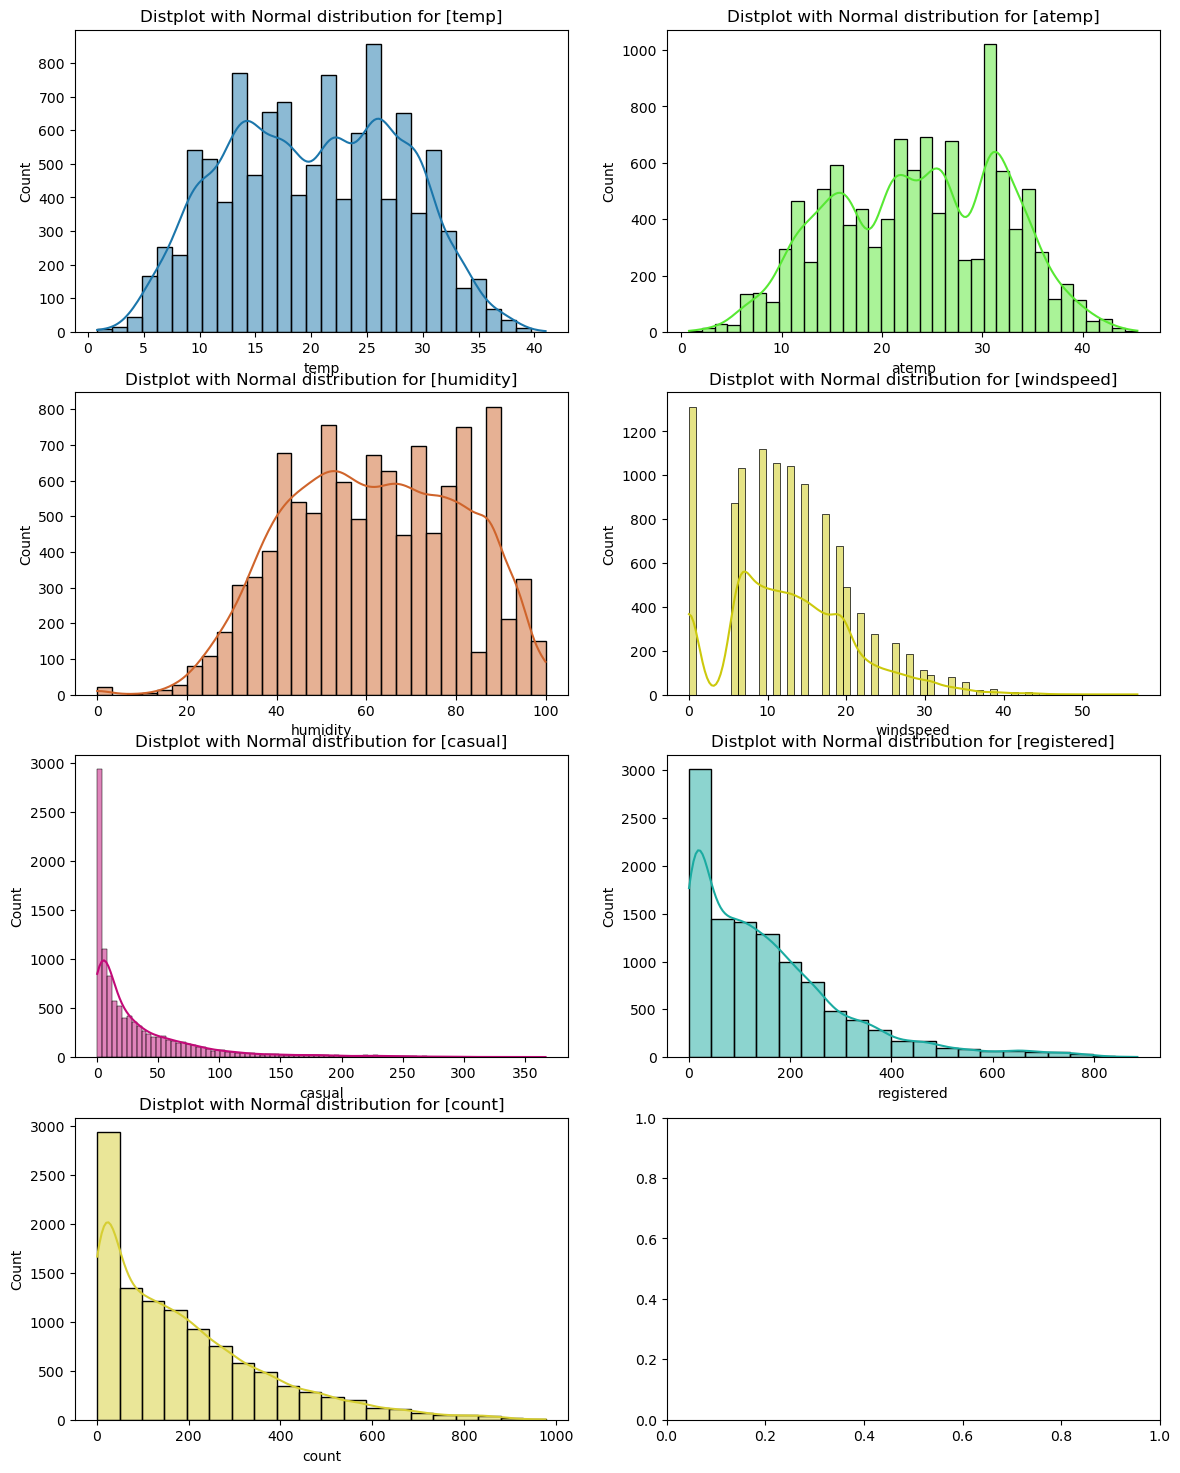

In [18]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
fig.subplots_adjust(top=1.5)
g1 = sns.histplot(data=df_ctgy, x="temp", kde=True, ax=axis[0,0],color="#1b76ab",bins=30)
g1.set_title("Distplot with Normal distribution for [temp]")
g2 = sns.histplot(data=df_ctgy, x="atemp", kde=True, ax=axis[0,1],color="#57e833")
g2.set_title("Distplot with Normal distribution for [atemp]")
g3 = sns.histplot(data=df_ctgy, x="humidity", kde=True, ax=axis[1,0],color="#cf642b",bins=30)
g3.set_title("Distplot with Normal distribution for [humidity]")
g4 = sns.histplot(data=df_ctgy, x="windspeed", kde=True, ax=axis[1,1],color="#ccc90c")
g4.set_title("Distplot with Normal distribution for [windspeed]")
g5 = sns.histplot(data=df_ctgy, x="casual", kde=True, ax=axis[2,0],color="#c20a78")
g5.set_title("Distplot with Normal distribution for [casual]",)
g6 = sns.histplot(data=df_ctgy, x="registered", kde=True, ax=axis[2,1],color="#1baba1",bins=20)
g6.set_title("Distplot with Normal distribution for [registered]")
g6 = sns.histplot(data=df_ctgy, x="count", kde=True, ax=axis[3,0],color="#d6ce33",bins=20)
g6.set_title("Distplot with Normal distribution for [count]")
plt.show()

#### >> Temperature: The temperature values exhibit a normal distribution, with the bulk of the temperatures situated between 10 and 32 degrees Celsius.
#### >> aTemp: The aTemp values show a slight right skew, with the majority of the temperatures falling within the 10 to 38 degrees Celsius range.
#### >> Humidity: The values for humidity are primarily distributed between 30 and 90.
#### >> Windspeed: Days with a windspeed greater than 20 are comparatively fewer.
#### >> Casual Users: On most days, the number of casual users tends to be between 1 and 100.
#### >> Registered Users: On the majority of days, the number of registered users typically falls within the 1 to 400 range.
#### >> Total Rental Bikes: The total count of rental bikes on most days lies between 1 and 600.

## Correlation Analysis : To identify relationship between the Dependent and Independent Variables

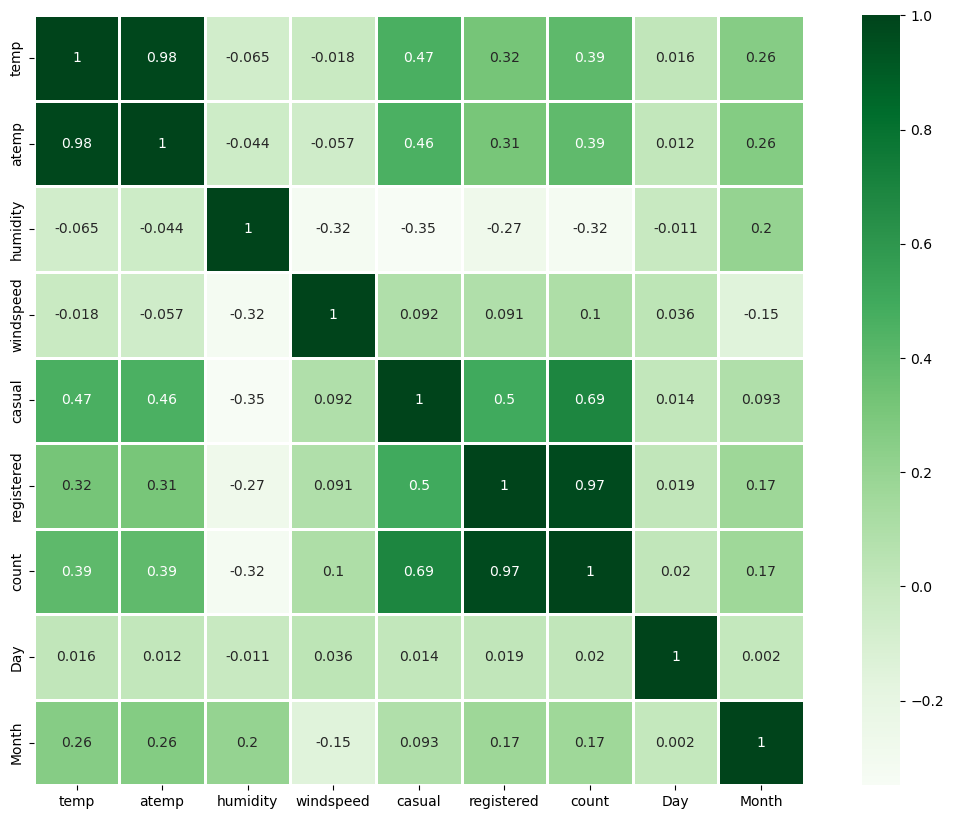

In [19]:
df_cor = df_ctgy[["temp","atemp","humidity","windspeed","casual","registered","count","Day","Month"]]
plt.figure(figsize = (15, 10))
sns.heatmap(data=df_cor.corr(), annot=True, cmap="Greens",square=True,linewidths=1,linecolor='white')
plt.show()

#### >> The correlation between the count of total rental bikes and casual users is 0.69, indicating a strong positive relationship.
#### >> There is a moderate positive correlation of 0.5 between registered users and casual users.
#### >> Casual users show a moderate positive correlation with both temp and atemp, with correlation coefficients of 0.46 and 0.47 respectively.
#### >> There exists a high negative correlation between humidity and the count of total rental bikes, registered users, and casual users.
#### >> A significant correlation exists between casual users, the count of total rental bikes with temp and atemp. This suggests that weather is a key factor influencing bike rental.

## Bivariate & Multivariate Analysis

### Analysis based on Month Vs ['casual', 'registered', 'count']

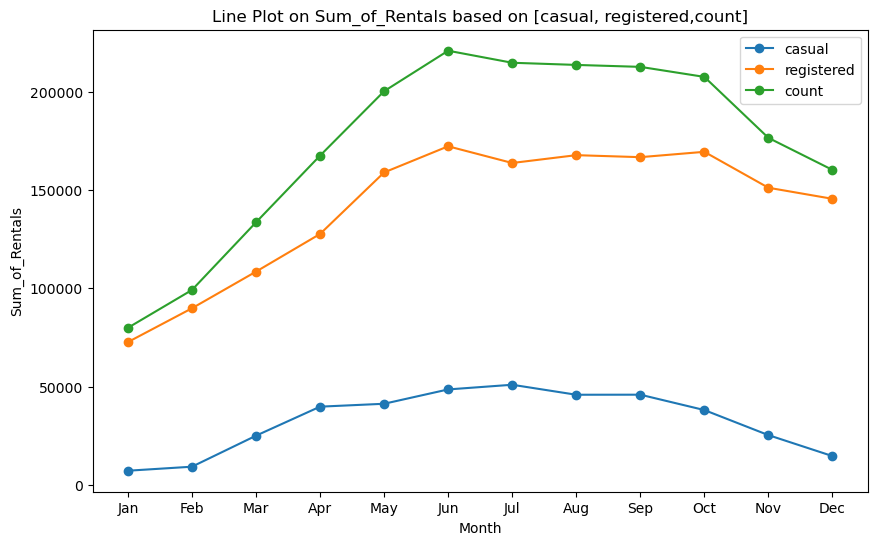

In [20]:
# Define the correct month order
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sum_df = df_ctgy.groupby('MonthName')[['casual', 'registered', 'count']].sum()
# Set MonthName as the index if it's not already
if 'MonthName' in sum_df.columns:
    mean_df.set_index('MonthName', inplace=True)
# Sort the DataFrame by month
sum_df = sum_df.reindex(months)
numerical_columns = ['casual', 'registered', 'count']
plt.figure(figsize=(10,6))
for column in numerical_columns:
    plt.plot(sum_df.index, sum_df[column],marker = 'o', label=column)
plt.xlabel('Month')
plt.ylabel('Sum_of_Rentals')
plt.title('Line Plot on Sum_of_Rentals based on [casual, registered,count]')
plt.legend()
plt.show()

- **Highest Rentals:** The month with the highest total count of bike rentals is **June**, followed closely by **July** and **August**. This suggests that bike rentals are most popular in the summer months.
- **Lowest Rentals:** The month with the lowest total count of bike rentals is **January**, followed by **February** and **December**. This indicates that bike rentals are least popular in the winter months.
- **Casual vs Registered Users:** Across all months, the number of rentals by registered users is significantly higher than that by casual users. This could suggest that regular bike users are more likely to register.
- **Seasonal Trends:** There is a clear seasonal trend in bike rentals, with demand increasing from January to June, then slightly decreasing towards the end of the year.

### Analysis on distribution of bike rentals across all seasons based on workingday

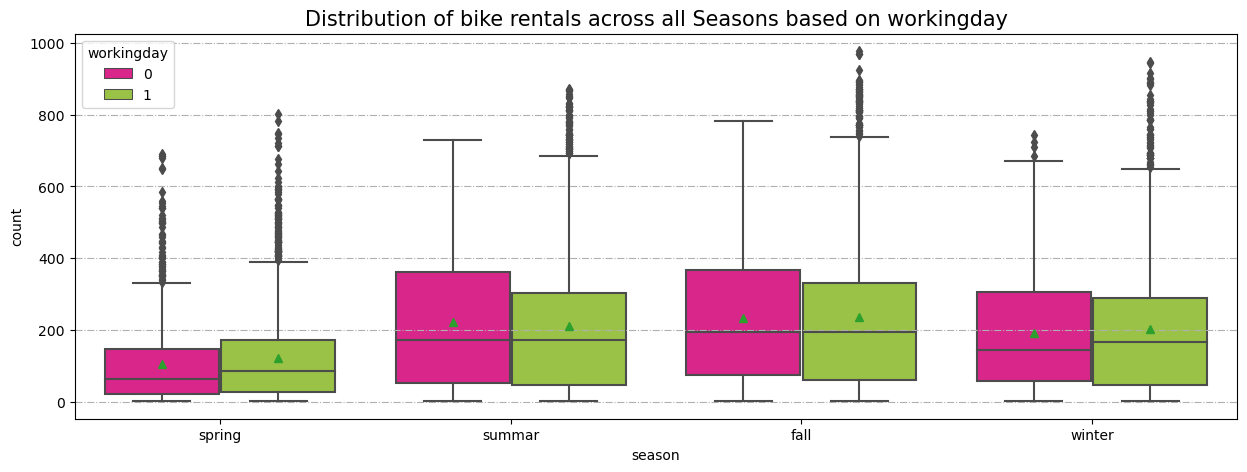

In [21]:
plt.figure(figsize = (15, 5))
plt.title('Distribution of bike rentals across all Seasons based on workingday',
         fontdict = {'size' : 15,'style' : 'normal'})
sns.boxplot(data = df_ctgy, x = 'season', y = 'count', hue = 'workingday',
            showmeans = True,palette = ["#F7088F","#a0d633"],zorder = 2)
plt.grid(axis = 'y', linestyle = 'dashdot')
plt.show()

#### >> The fall season sees the highest hourly count of total rental bikes, with summer and winter seasons following closely.
#### >> The spring season typically records a lower hourly count of total rental bikes.

### Analysis on distribution of bike rentals across all weather based on workingday

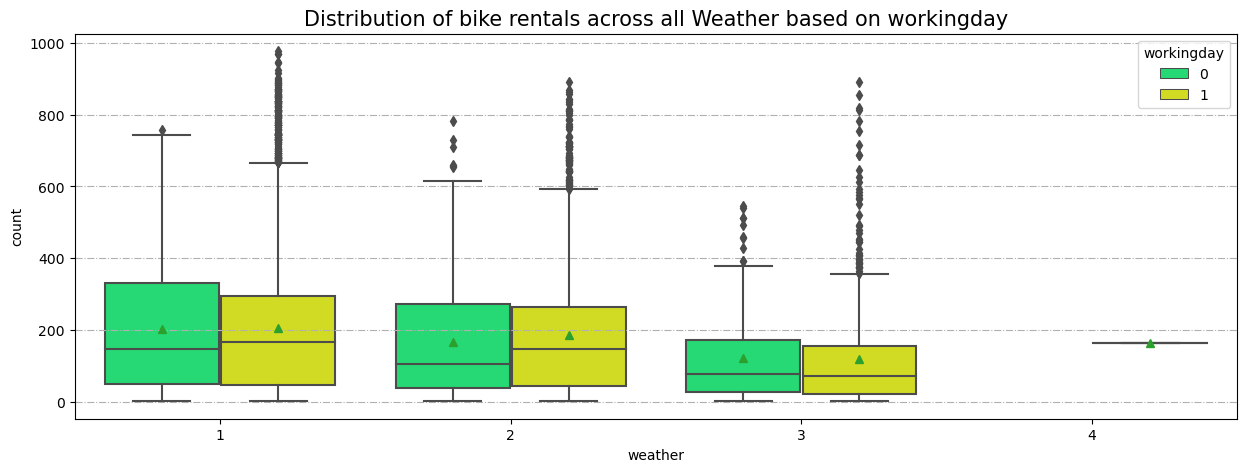

In [22]:
plt.figure(figsize = (15, 5))
plt.title('Distribution of bike rentals across all Weather based on workingday',
         fontdict = {'size' :15,'style' : 'normal'})
sns.boxplot(data = df_ctgy, x = 'weather', y = 'count', hue = 'workingday',
            showmeans = True,palette = ["#08F770","#EDF906"],zorder = 2)
plt.grid(axis = 'y', linestyle = 'dashdot')
plt.show()

#### >> Clear and cloudy weather conditions see a higher hourly count of total rental bikes, with misty and rainy weather following.
#### >> Extreme weather conditions have very few records of bike rentals.

### Analysis based on Year Vs [Weather / Season]

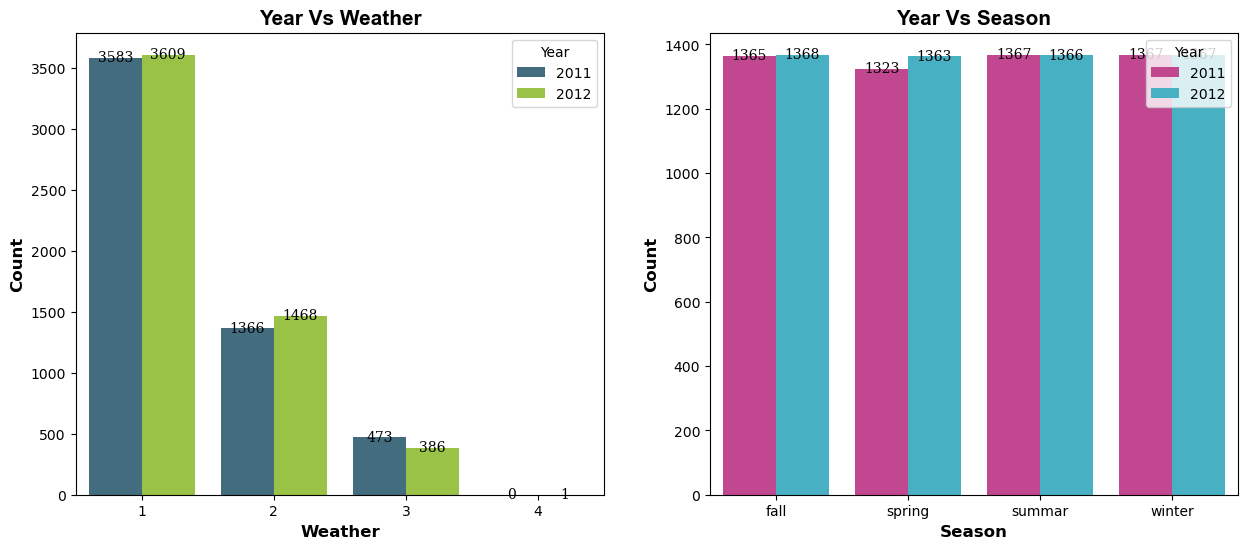

In [23]:
#Setting Plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)
#### 'Year Vs Weather'
#creating bar plot
ax1 = fig.add_subplot(gs[0,0])
plot = sns.countplot(data = df_ctgy, x = 'weather', hue = 'Year',order = sorted(df_ctgy['weather'].unique()), 
              ax = ax1,palette = ["#3A7089","#a0d633"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax1.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
#adding axis label
ax1.set_xlabel('Weather',fontweight = 'bold',fontsize = 12)
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
#setting title for visual
ax1.set_title('Year Vs Weather',{'font':'Arial', 'size':15,'weight':'bold'})
#### 'Year Vs Season'
## Creating Bar plot
ax2 = fig.add_subplot(gs[0,1])
plot = sns.countplot(data = df_ctgy, x = 'season', hue = 'Year',order = sorted(df_ctgy['season'].unique()), 
              ax = ax2,palette = ["#d63395","#33bed6"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax2.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
# Customizing axis labels
ax2.set_xlabel('Season',fontweight = 'bold',fontsize = 12)
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
# Setting title for visual
ax2.set_title('Year Vs Season',{'font':'Arial', 'size':15,'weight':'bold'})    
plt.show()

***>> Weather condition 1 seems to be the most favorable for bicycle rentals, with the highest number of rentals in both 2011 and 2012.***

***>> Weather condition 2 also shows a significant number of rentals, although less than half of those in weather condition 1.***

***>> Weather condition 3 has the least number of rentals among the three main weather conditions, and it shows a decrease from 2011 to 2012.***

***>> Weather condition 4 has almost no rentals, with only 1 rental observed in 2012.***

***>> The number of bicycle rentals is fairly consistent across all seasons, with only minor variations.***

***>> The seasons do not seem to have a significant impact on the number of bicycle rentals, as the numbers are almost equal for all seasons in both years.***

***>> There is a slight increase in rentals during the spring season from 2011 to 2012.***

### Analysis based on Year Vs [temp_bins / atemp_bins]

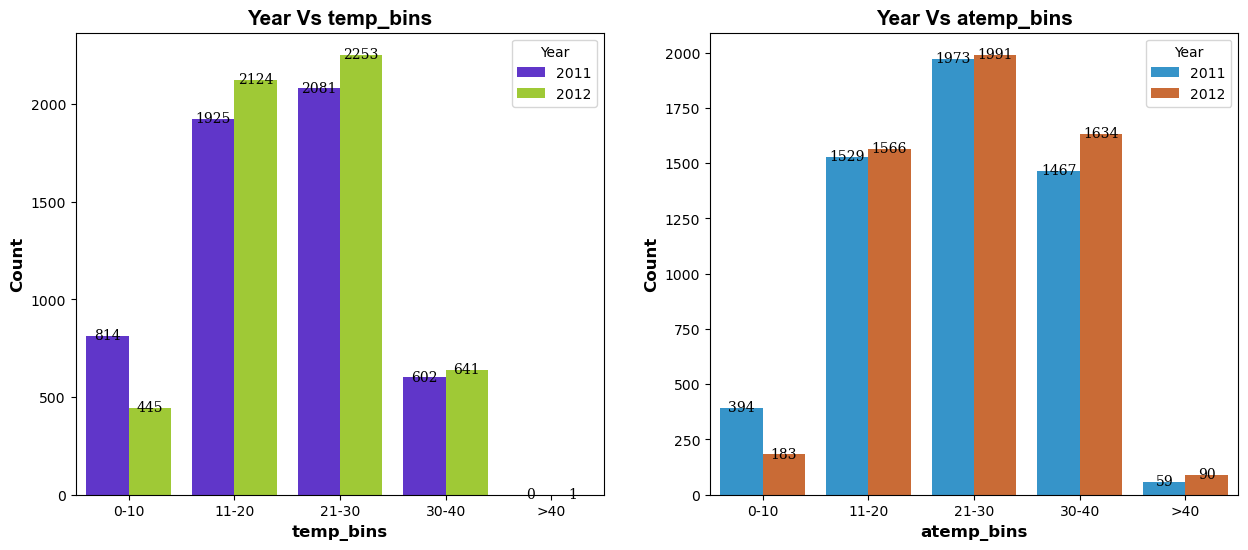

In [24]:
#Setting Plot style
fig = plt.figure(figsize = (15,6))
gs = fig.add_gridspec(1,2)
#### 'Year Vs temp'
#creating bar plot
ax1 = fig.add_subplot(gs[0,0])
plot = sns.countplot(data = df_ctgy, x = 'temp_bins', hue = 'Year',order = sorted(df_ctgy['temp_bins'].unique()), 
              ax = ax1,palette = ["#551EE1","#AAE11E"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax1.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
#adding axis label
ax1.set_xlabel('temp_bins',fontweight = 'bold',fontsize = 12)
ax1.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
#setting title for visual
ax1.set_title('Year Vs temp_bins',{'font':'Arial', 'size':15,'weight':'bold'})
#### 'Year Vs atemp'
## Creating Bar plot
ax2 = fig.add_subplot(gs[0,1])
plot = sns.countplot(data = df_ctgy, x = 'atemp_bins', hue = 'Year',order = sorted(df_ctgy['atemp_bins'].unique()), 
              ax = ax2,palette = ["#1E9BE1","#E1641E"],zorder = 2)
#adding the value_counts for Data labels
for i in plot.patches:
    ax2.text(i.get_x()+0.2,i.get_height()+1,f'{i.get_height():.0f}',{'font':'serif','size' : 10},ha = 'center',va = 'center')
# Customizing axis labels
ax2.set_xlabel('atemp_bins',fontweight = 'bold',fontsize = 12)
ax2.set_ylabel('Count',fontweight = 'bold',fontsize = 12)
# Setting title for visual
ax2.set_title('Year Vs atemp_bins',{'font':'Arial', 'size':15,'weight':'bold'})    
plt.show()

***>> The highest bike rental counts are observed when the actual temperature (atemp_bins) and the feeling temperature (temp_bins) are both in the range of 11-30 degrees. This suggests that moderate temperatures are most favorable for bike rentals.***

***>> There are no bike rentals observed when the actual temperature is below 10 degrees and the feeling temperature is above 10 degrees, and vice versa. This indicates that there is a strong correlation between the actual temperature and the feeling temperature in terms of influencing bike rentals.***

***>> Bike rentals significantly drop when the temperature exceeds 40 degrees, indicating that extreme temperatures are not favorable for bike rentals.***

***>> There is a gradual increase in bike rentals as the temperature rises from 0 to 30 degrees, and then a decrease as the temperature continues to rise above 30 degrees. This suggests that there is an optimal temperature range for bike rentals, roughly between 11 and 30 degrees.***

# Hypothesis_Testings:

## 2-sample t-test : To check if there any significant difference between the no. of bike rides on Weekdays?

**Null Hypothesis:** Working day has No effect on the number of cycles being rented.

**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

**Significance level (alpha): 0.05**

We will use the **2-Sample T-Test** to test the hypothess defined above

In [25]:
weekdays = df_ctgy[df_ctgy['workingday'] == 1]['count']
weekends = df_ctgy[df_ctgy['workingday'] == 0]['count']

reject_H0 = "Reject_H0 : The two population means are different. We can conclude that Working Day has some effect on the number of electric cycles rented."
accept_H0 = "Accept_H0 :The two population means are Not different. We can conclude that Working Day has No effect on the number of electric cycles rented."
# Performing a 2-sample t-test
t_stat, p_value = stats.ttest_ind(weekdays, weekends)
print(f'T-stats: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')
# Set significance level
alpha = 0.05
# Decision making
# A low p-value (< 0.05) indicates that the two population means are different.
if p_value <= alpha:
    print(reject_H0)
    #print("Reject H0 : The two population means are different")
else:
    print(accept_H0)
    #print("Accept H0: The two population means are not significantly different. we can conclude that Working day has No effect on the number of cycles being rented.")

T-stats: 1.2096
P-value: 0.2264
Accept_H0 :The two population means are Not different. We can conclude that Working Day has No effect on the number of electric cycles rented.


### Insights:
- The demand for electric cycles is consistent regardless of whether it’s a working day or not. This could imply that the cycles are being used for more than just commuting to work or school; they might be used for leisure activities, errands, or other non-work related travel.
### Recommendations:
- Since the demand is consistent throughout the week, ensure that there are enough cycles available every day to meet this demand.
- Consider marketing strategies that highlight the various uses of electric cycles beyond just commuting, as the data suggests they’re being used for a variety of purposes.
- Regular maintenance should be carried out to ensure the cycles are in good condition, as consistent usage could lead to wear and tear.
- Finally, consider offering special promotions or discounts on non-working days to encourage even more usage during these times. This could help to further increase the popularity and usage of the electric cycles.

## One-way ANOVA test : To Check if the demand of bicycles on rent is the same for different Weather conditions?

**Null Hypothesis H0:** The means of bicycle rentals for all weather conditions are the same.

**Alternate Hypothesis H1:** At least one weather condition has a different mean for bicycle rentals.

**Significance level (alpha): 0.05**

We will use the **One-way ANOVA test** to test the hypothess defined above.

**NOTE:** Weather category "4" contains only one record, we're are ignoring that record for this test as we can't use that data for ANOVA test.

In [26]:
# Formulate the Null and Alternate Hypothesis
reject_H0 = "Reject_H0 : We reject the null hypothesis and conclude that at least one weather condition has a different mean for bicycle rentals."
accept_H0 = "Accept_H0 : We fail to reject the null hypothesis and conclude that the means of bicycle rentals for all weather conditions are the same."
#---------------------To Perform ANOVA test-------------------
print("*"*15,"[ANOVA] test results ","*"*45)
w1 = df_ctgy['count'][df_ctgy['weather'] == 1]
w2 = df_ctgy['count'][df_ctgy['weather'] == 2]
w3 = df_ctgy['count'][df_ctgy['weather'] == 3]

# Perform ANOVA
f_val, p_val = stats.f_oneway(w1,w2,w3)
print("ANOVA_F-value:", f_val)
print("ANOVA_p-value:", p_val)

alpha = 0.05  # As given

# if anova.pvalue < alpha:
print("Conclution:")
if p_val < alpha:
    print(reject_H0)
else:
    print(accept_H0)
print(" ")  
#---------------------To check Normality shapiro test-------------------
print("*"*15,"[Shapiro] test results ","*"*45)    
# Check Normality
print("Normality Test-weather_1", stats.shapiro(w1))
print("Normality Test-weather_2", stats.shapiro(w2))
print("Normality Test-weather_3", stats.shapiro(w3))
print(" ")
#---------------------To check Homogeneity/Equality of Variance Levene’s test -------------------
print("*"*15,"[Levene’s] test results ","*"*45)  
# Check Homogeneity/Equality of Variance
print("Levene's Test:", stats.levene(w1,w2,w3))
print(" ")
#---------------------To check Skewness & Kurtosis -------------------
print("*"*15,"[Skewness & Kurtosis test] results ","*"*45) 
# Calculate skewness and kurtosis for each weather condition
weather_conditions = df_ctgy['weather'][df_ctgy['weather']!=4].unique()
for condition in weather_conditions:
    data = df_ctgy['count'][df_ctgy['weather'] == condition]
#     print(f"For weather_{condition}:")
#     print(f"Skewness: {skew(data)}")
#     print(f"Kurtosis: {kurtosis(data)}")
    print(f"For weather_{condition}, Skewness: {skew(data)}, Kurtosis: {kurtosis(data)}",)
    
# If skewness is less than 0, then the distribution is negatively skewed.
# In a negatively skewed distribution, the left tail is longer or fatter than the right tail.
# Also, the majority of the values (including the median) lie to the right of the mean.

# If skewness is greater than 0, then the distribution is positively skewed.
# In a positively skewed distribution, the right tail is longer or fatter than the left tail.
# Also, the majority of the values (including the median) lie to the left of the mean.

# If skewness is equal to 0, then the distribution is symmetrical.
# That means the distribution looks the same to the left and right of the mean.

*************** [ANOVA] test results  *********************************************
ANOVA_F-value: 98.28356881946706
ANOVA_p-value: 4.976448509904196e-43
Conclution:
Reject_H0 : We reject the null hypothesis and conclude that at least one weather condition has a different mean for bicycle rentals.
 
*************** [Shapiro] test results  *********************************************
Normality Test-weather_1 ShapiroResult(statistic=0.8909230828285217, pvalue=0.0)
Normality Test-weather_2 ShapiroResult(statistic=0.8767687082290649, pvalue=9.781063280987223e-43)
Normality Test-weather_3 ShapiroResult(statistic=0.7674332857131958, pvalue=3.876090133422781e-33)
 
*************** [Levene’s] test results  *********************************************
Levene's Test: LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)
 
*************** [Skewness & Kurtosis test] results  *********************************************
For weather_1, Skewness: 1.1396195185041555, Kurtosis: 0.9

C:\Users\kames\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Using Histogram to visualise the Distribution of different Weather conditions

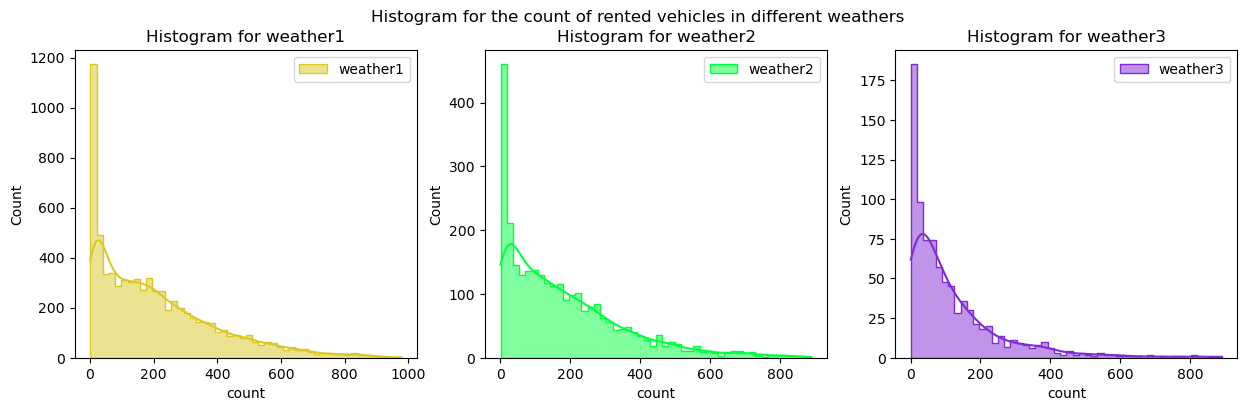

In [27]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
plt.suptitle('Histogram for the count of rented vehicles in different weathers')
sns.histplot(data = w1, bins = 50, element = 'step', color = '#DBC824', kde = True, label = 'weather1')
plt.legend()
plt.title('Histogram for weather1')
plt.subplot(1, 3, 2)
sns.histplot(data = w2, bins = 50, element = 'step', color = '#00FF3C', kde = True, label = 'weather2')
plt.legend()
plt.title('Histogram for weather2')
plt.subplot(1, 3, 3)
sns.histplot(data = w3, bins = 50, element = 'step', color = '#812BD4', kde = True, label = 'weather3')
plt.legend()
plt.title('Histogram for weather3')
plt.show()

## Using Q-Q Plot to visualise the Distribution of different Weather conditions

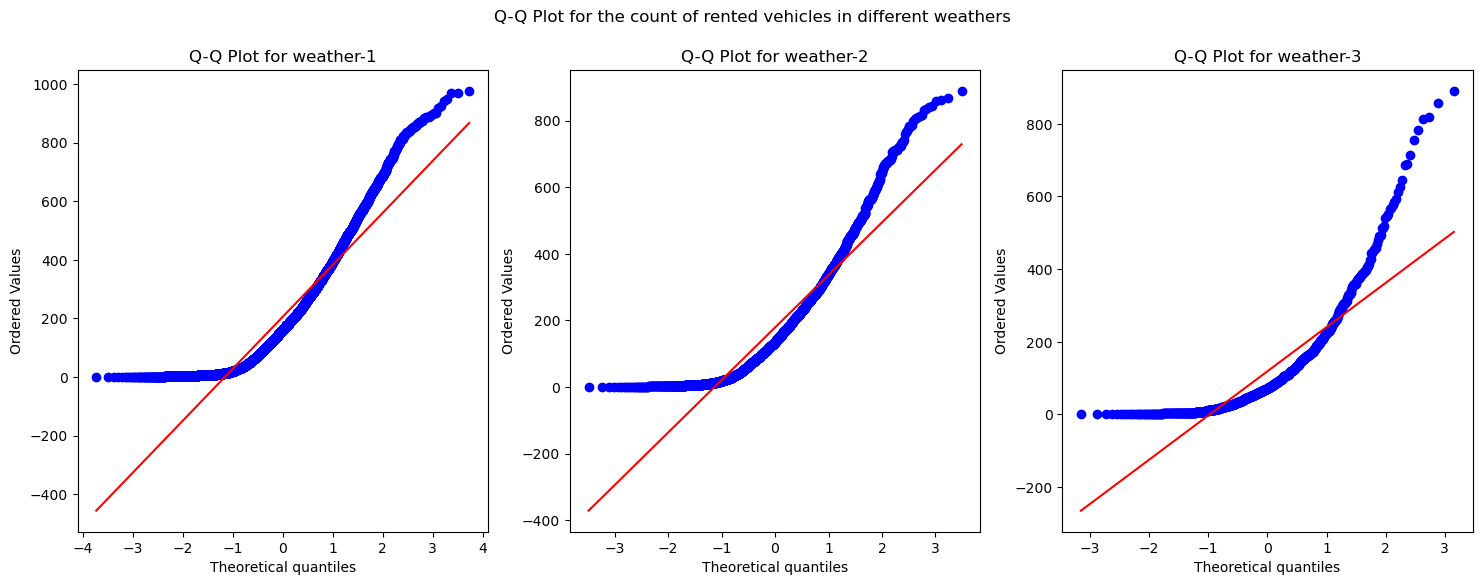

In [28]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('Q-Q Plot for the count of rented vehicles in different weathers')
scist.probplot(w1, plot = plt, dist = 'norm')
plt.title('Q-Q Plot for weather-1')
plt.subplot(1, 3, 2)
scist.probplot(w2, plot = plt, dist = 'norm')
plt.title('Q-Q Plot for weather-2')
plt.subplot(1, 3, 3)
scist.probplot(w3, plot = plt, dist = 'norm')
plt.title('Q-Q Plot for weather-3')
plt.show()

### Interpretations:
- **ANOVA Test:**  The extremely small p-value (4.976448509904196e-43) leads us to discard the null hypothesis. This implies that the mean number of bicycle rentals differs significantly for at least one type of weather condition.
- **Shapiro Test:** The p-values for all three weather conditions are less than 0.05, suggesting that the bicycle rental data does not adhere to a normal distribution for any of the weather conditions.
- **Levene’s Test:** The small p-value (6.198278710731511e-36) suggests that the variances are not the same for the different weather conditions.
- **Skewness & Kurtosis Test:** The positive skewness values for all weather conditions suggest that the distributions are skewed to the right. The kurtosis values indicate that the distributions have more extreme values compared to a normal distribution.
### Recommendations:
- As the mean number of bicycle rentals varies with weather conditions, it would be beneficial to adjust the availability of bicycles based on the weather forecast.
- The right-skewed distributions indicate that there are days with exceptionally high bicycle rentals. Understanding the factors contributing to these outliers could help in enhancing the service.
- The heavy-tailed distributions suggest that extreme values are more probable than under a normal distribution. Therefore, the service should be equipped to handle such high-demand scenarios.

## One-way ANOVA test : Check if the demand of bicycles on rent is the same for different Seasons?

**Null Hypothesis H0:** The means of bicycle rentals for all seasons are the same.

**Alternate Hypothesis H1:** At least one season has a different mean for bicycle rentals.

**Significance level (alpha): 0.05**

We will use the **One-way ANOVA test** to test the hypothess defined above.

In [29]:
# Formulate the Null and Alternate Hypothesis
reject_H0 = "We reject the null hypothesis and conclude that at least one season has a different mean for bicycle rentals."
accept_H0 = "We fail to reject the null hypothesis and conclude that The means of bicycle rentals for all seasons are the same."
#---------------------To Perform ANOVA test-------------------
print("*"*15,"[ANOVA] test results ","*"*45)
s1 = df_ctgy['count'][df_ctgy['season'] == "fall"]
s2 = df_ctgy['count'][df_ctgy['season'] == "spring"]
s3 = df_ctgy['count'][df_ctgy['season'] == "summar"]
s4 = df_ctgy['count'][df_ctgy['season'] == "winter"]

# Perform ANOVA
f_val, p_val = stats.f_oneway(s1,s2,s3,s4)
print("ANOVA_F-value:", f_val)
print("ANOVA_p-value:", p_val)

alpha = 0.05  # As given

# if anova.pvalue < alpha:
print("Conclution:")
if p_val < alpha:
    print(reject_H0)
else:
    print(accept_H0)
print(" ")  
#---------------------To check Normality shapiro test-------------------
print("*"*15,"[Shapiro] test results ","*"*45)    
# Check Normality
print("Normality Test [fall]", stats.shapiro(s1))
print("Normality Test [spring]", stats.shapiro(s2))
print("Normality Test [summar]", stats.shapiro(s3))
print("Normality Test [winter]", stats.shapiro(s4))
print(" ")
#---------------------To check Homogeneity/Equality of Variance Levene’s test -------------------
print("*"*15,"[Levene’s] test results ","*"*45)  
# Check Homogeneity/Equality of Variance
print("Levene's Test:", stats.levene(s1,s2,s3,s4))
print(" ")
#---------------------To check Skewness & Kurtosis -------------------
print("*"*15,"[Skewness & Kurtosis test] results ","*"*45) 
# Calculate skewness and kurtosis for each weather condition
seasons = df_ctgy['season'].unique()
for season in seasons:
    data = df_ctgy['count'][df_ctgy['season'] == season]
    print(f"For Seson_{season}, Skewness: {skew(data)}, Kurtosis: {kurtosis(data)}",)
    
# If skewness is less than 0, then the distribution is negatively skewed.
# In a negatively skewed distribution, the left tail is longer or fatter than the right tail.
# Also, the majority of the values (including the median) lie to the right of the mean.

# If skewness is greater than 0, then the distribution is positively skewed.
# In a positively skewed distribution, the right tail is longer or fatter than the left tail.
# Also, the majority of the values (including the median) lie to the left of the mean.

# If skewness is equal to 0, then the distribution is symmetrical.
# That means the distribution looks the same to the left and right of the mean.

*************** [ANOVA] test results  *********************************************
ANOVA_F-value: 236.94671081032115
ANOVA_p-value: 6.164843386499654e-149
Conclution:
We reject the null hypothesis and conclude that at least one season has a different mean for bicycle rentals.
 
*************** [Shapiro] test results  *********************************************
Normality Test [fall] ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)
Normality Test [spring] ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)
Normality Test [summar] ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)
Normality Test [winter] ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)
 
*************** [Levene’s] test results  *********************************************
Levene's Test: LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)
 
*************** [Skewness & Kurtosis test] results  ******************************

## Using Histogram to visualise the Distribution of different Seasons

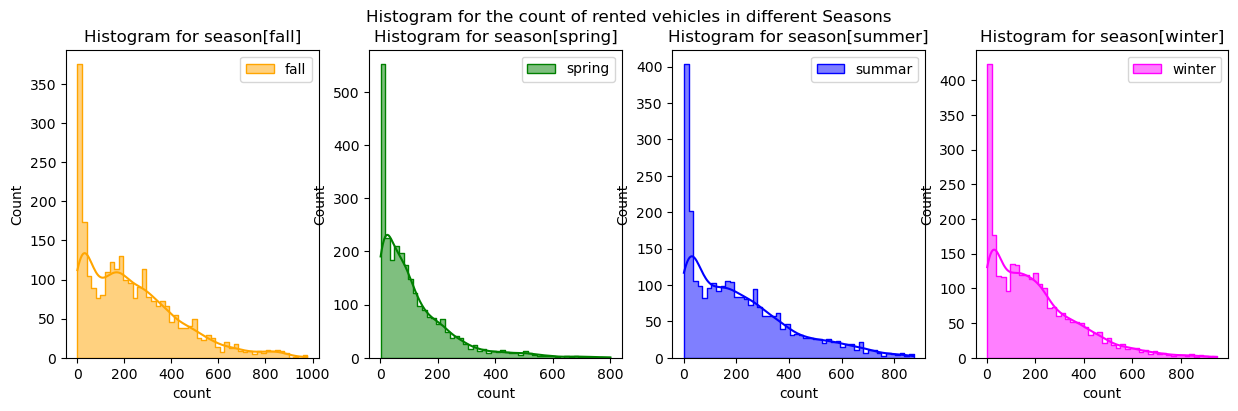

In [30]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 4, 1)
plt.suptitle('Histogram for the count of rented vehicles in different Seasons')
plt.title('Histogram for season[fall]')
sns.histplot(data = s1, bins = 50, element = 'step', color = 'orange', kde = True, label = 'fall')
plt.legend()
plt.subplot(1, 4, 2)
sns.histplot(data = s2, bins = 50, element = 'step', color = 'green', kde = True, label = 'spring')
plt.title('Histogram for season[spring]')
plt.legend()
plt.subplot(1, 4, 3)
sns.histplot(data = s3, bins = 50, element = 'step', color = 'blue', kde = True, label = 'summar')
plt.title('Histogram for season[summer]')
plt.legend()
plt.subplot(1, 4, 4)
sns.histplot(data = s4, bins = 50, element = 'step', color = 'magenta', kde = True, label = 'winter')
plt.title('Histogram for season[winter]')
plt.legend()
plt.show()

## Using Q-Q Plot to visualise the Distribution of different Seasons

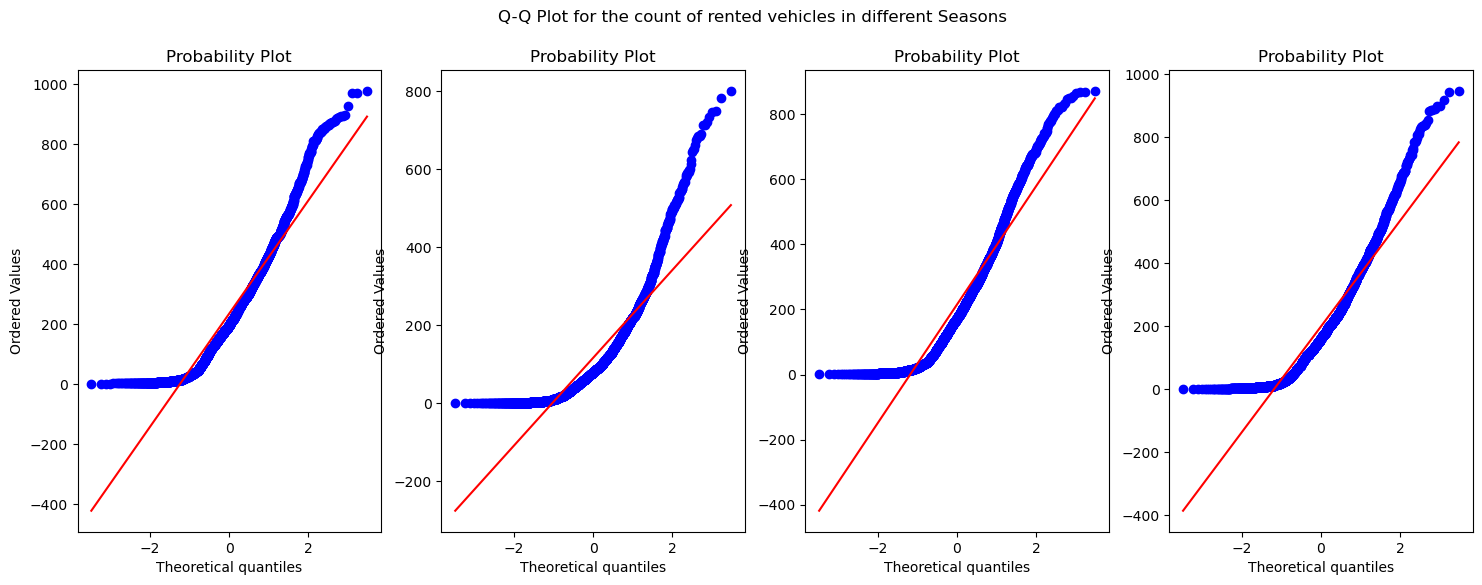

In [31]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 4, 1)
plt.suptitle('Q-Q Plot for the count of rented vehicles in different Seasons')
plt.title('Q-Q Plot for [fall]')
scist.probplot(s1, plot = plt, dist = 'norm')
plt.subplot(1, 4, 2)
plt.title('Q-Q Plot for [spring]')
scist.probplot(s2, plot = plt, dist = 'norm')
plt.subplot(1, 4, 3)
plt.title('Q-Q Plot for [summar]')
scist.probplot(s3, plot = plt, dist = 'norm')
plt.subplot(1, 4, 4)
plt.title('Q-Q Plot for [winter]')
scist.probplot(s4, plot = plt, dist = 'norm')
plt.show()

### Interpretations:
- **ANOVA Test:**  The extremely low p-value (6.164843386499654e-149) leads us to reject the null hypothesis. This means that the average number of bicycle rentals is significantly different for at least one season.
- **Shapiro Test:** The p-values for all four seasons are less than 0.05, indicating that the bicycle rental data does not follow a normal distribution for any of the seasons.
- **Levene’s Test:** The low p-value (1.0147116860043298e-118) indicates that the variances are not equal for the different seasons.
- **Skewness & Kurtosis Test:** The positive skewness values for all seasons indicate that the distributions are right-skewed. The kurtosis values suggest that the distributions have heavier tails compared to a normal distribution.
### Recommendations:
- Since the average number of bicycle rentals varies with seasons, consider adjusting the supply of bicycles based on the season.
- Given the unequal variances, statistical techniques that do not assume homogeneity of variance would be more appropriate.
- The right-skewed distributions suggest that there are days with exceptionally high bicycle rentals. Identifying the factors contributing to these outliers could help in improving the service.
- The heavy-tailed distributions indicate that extreme values are more likely than under a normal distribution. Therefore, the service should be prepared to handle such high-demand scenarios.

## Chi-square test: Check if the Weather conditions are significantly different during different Seasons?

**Null Hypothesis H0:** Weather is independent of the season.

**Alternate Hypothesis H1:** Weather is Not independent of the season.

**Significance level (alpha): 0.05**

We will use the **Chi-square test** to test the hypothess defined above.

In [32]:
data_table = pd.crosstab(df_ctgy['season'], df_ctgy['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summar,1801,708,224,0
winter,1702,807,225,0


In [33]:
# Formulate the Null and Alternate Hypothesis
reject_H0 = "Weather is Not independent of the season."
accept_H0 = "Weather is independent of the season."

# Create a Contingency Table
contingency_table = pd.crosstab(df_ctgy['weather'], df_ctgy['season'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2-value:", chi2)
print("p-value:", p)
print("Degree of Freedom:",  dof)
print("Expected:", expected)

alpha = 0.05  # As given
if p < alpha:
    print("Reject_H0: ", reject_H0)
else:
    print("Accept_H0: ", accept_H0)

chi2-value: 49.15865559689363
p-value: 1.5499250736864862e-07
Degree of Freedom: 9
Expected: [[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01]]
Reject_H0:  Weather is Not independent of the season.


### Interpretations:
- The Chi-Square test of independence was performed with a resulting chi2-value of 49.16 and a p-value of approximately 1.55e-07. Given the low p-value (less than the significance level of 0.05), the null hypothesis is rejected. This means that weather conditions are not independent of the seasons.
- Weather condition 1 seems to be the most prevalent across all seasons, with the highest number of occurrences.
- Weather condition 4 is the least prevalent, with almost no occurrences across all seasons.
### Recommendations:
- Since weather conditions are not independent of the seasons, it would be beneficial to consider both the season and the weather forecast when planning for bicycle rentals.
- Given that weather condition 1 is the most prevalent, ensure that there are enough bicycles available during this weather condition across all seasons.
- Investigate the characteristics of weather condition 4 to understand why it is the least prevalent. Consider whether it’s cost-effective to offer rentals during this weather condition.
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Insights:

### We’ve made several intriguing observations from the Yulu dataset, here’s a brief overview of some of them:
- **Yearly Usage:**  The data shows a substantial rise in bicycle rentals from 2011 to 2012 for both casual and registered users. This indicates an increasing trend in the usage of the bicycle rental service.
- **Monthly Usage:**  The peak usage months are August, July, June, and September, suggesting that the service is most popular during the summer and early fall. Conversely, the winter months (January, February, and December) see the least usage.
- **Working Days vs Non-Working Days:**  There are significantly more total rentals on working days (both casual and registered) compared to non-working days. This could suggest that bicycles are being used for commuting to work or school.
- **Holidays vs Non-Holidays:**  The total number of rentals is significantly lower on holidays compared to non-holidays for both casual and registered users. This could be due to people staying at home or using other modes of transportation during holidays.
- **Temperature and Bike Rentals:** The highest total count of bike rentals (both casual and registered) is observed when the temperature is in the range of 21-30 degrees and the feeling temperature is in the range of 30-40 degrees. This suggests that moderate temperatures are most favorable for bike rentals.

- **Registered vs Casual Users:** Registered users rent bikes more frequently than casual users across all temperature ranges. This could indicate that regular bike users are more likely to register.

- **Extreme Temperatures:** The count of bike rentals (both casual and registered) decreases significantly when the temperature or the feeling temperature exceeds 40 degrees, indicating that extreme temperatures are not favorable for bike rentals.

- **Optimal Temperature Range:** There is a gradual increase in bike rentals as the temperature rises from 0 to 30 degrees, and then a decrease as the temperature continues to rise above 30 degrees. Similarly, for the feeling temperature, bike rentals increase as it rises from 0 to 40 degrees, and then decrease as it continues to rise above 40 degrees. This suggests that there is an optimal temperature range for bike rentals, roughly between 21 and 30 degrees for actual temperature, and between 21 and 40 degrees for feeling temperature.
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Recommendations:

### Below are my suggestions, derived from the insights I’ve gathered from the Yulu dataset.
- **Promotion and Advertising:**  Given the growth in rentals from 2011 to 2012, it would be beneficial to intensify promotional activities to sustain this upward trend. Special offers or discounts could be particularly effective during the high-demand summer and early fall months.
- **Inventory Management:**  Given the high demand on working days, ensure that there are enough bicycles available to meet this demand. On non-working days and holidays, it might be possible to reduce inventory or perform maintenance tasks.
- **Temperature-Based Planning:** Ensure enough bicycles are available when the temperature is between 11-30 degrees, the range with most rentals.
- **Supply Management:**  Make sure there are enough bicycles available during the summer and early fall months to cater to the increased demand. On the other hand, it might be possible to decrease inventory during the winter months when demand is lower.
- **Seasonal Planning:** Despite the overall consistency, investigate the slight increase in rentals during the spring season in 2012. Understanding the reasons behind this increase could provide insights for further improving the service.
- **Enhancing Winter Usage:**  Look into the reasons for lower usage during the winter months. If it’s due to harsh weather conditions, consider offering services or accessories tailored for winter (like heated handlebars or winter riding classes) to promote usage during these months.
- **Promotions:** Consider offering special promotions or discounts on non-working days and holidays to encourage more usage on these days.
- **User Research:** Conduct user research to understand why rentals drop on holidays and non-working days and use this information to devise strategies to increase rentals on these days.
- **User Engagement:** Encourage casual users to register by offering them special benefits. This could potentially increase the overall user base and rental counts.
- **Overall Strategy:** Develop a comprehensive strategy that considers the impact of weather conditions, temperature, and seasonality on bicycle rentals. This should ensure consistent availability and demand management throughout the year.
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~